Lab 10: Neural Networks
-----

## Prepare Training

In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.4.1


In [2]:
# If you run this notebook with colab, Change Edit > Notebook settings, hardware accelerator to "GPU"
# tf.device('/device:GPU:0')

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [4]:
def train_mnist (batch_size, optimizer, model, epochs, verbose):

  if model == 'dense':
    model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                        tf.keras.layers.Dense(128, activation='relu'), 
                                        tf.keras.layers.Dense(10, activation='softmax')])
  if model == '1layerconv':
    model = tf.keras.models.Sequential([tf.keras.layers.Reshape((28,28,1), input_shape=(28,28)),
                                        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
                                        tf.keras.layers.MaxPooling2D(2,2),
                                        tf.keras.layers.Flatten(), 
                                        tf.keras.layers.Dense(128, activation='relu'), 
                                        tf.keras.layers.Dense(10, activation='softmax')])

  model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  history = model.fit(training_images, training_labels, batch_size = batch_size, epochs=epochs, verbose = verbose,validation_data=(test_images, test_labels))

  return history.history

## Training with different batch_size

In [5]:
results=[]
n_train=training_images.shape[0]

# training with batch_size = 1 might take about 15 minutes
#batch_sizes = [1, 16, 64, 128, n_train]

batch_sizes = [16, 64, 128, n_train]

for i in range(len(batch_sizes)):
  results.append(train_mnist(batch_sizes[i], optimizer='adam', model='dense', epochs=10, verbose = 1))

Epoch 1/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.5959 - accuracy: 0.7925 - val_loss: 0.4787 - val_accuracy: 0.8219
Epoch 2/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3780 - accuracy: 0.8614 - val_loss: 0.3986 - val_accuracy: 0.8564
Epoch 3/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3259 - accuracy: 0.8794 - val_loss: 0.3594 - val_accuracy: 0.8716
Epoch 4/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3136 - accuracy: 0.8814 - val_loss: 0.3593 - val_accuracy: 0.8745
Epoch 5/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2947 - accuracy: 0.8907 - val_loss: 0.3687 - val_accuracy: 0.8704
Epoch 6/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2782 - accuracy: 0.8968 - val_loss: 0.3744 - val_accuracy: 0.8709
Epoch 7/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2676 - accuracy: 0.9012 - val_loss: 0.3660 - val_accuracy:

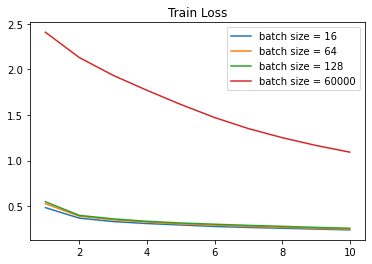

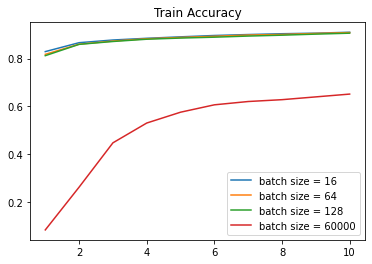

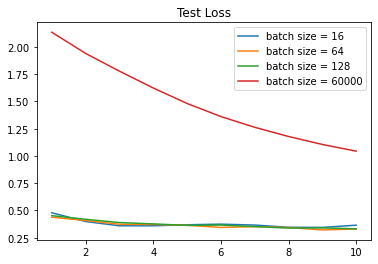

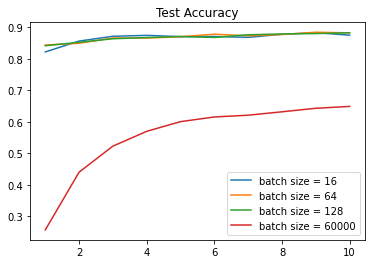

In [6]:
import matplotlib.pyplot as plt
num_epoch = len(results[0]['loss'])

plt.figure()
for i in range(len(batch_sizes)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['loss'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Train Loss")
plt.legend()

plt.figure()
for i in range(len(batch_sizes)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['accuracy'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Train Accuracy")
plt.legend()

plt.figure()
for i in range(len(batch_sizes)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['val_loss'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Test Loss")
plt.legend()

plt.figure()
for i in range(len(batch_sizes)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['val_accuracy'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Test Accuracy")
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
num_epoch = len(results[0]['loss'])

plt.figure()
for i in range(len(batch_sizes)-1):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['loss'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Train Loss")
plt.legend()

plt.figure()
for i in range(len(batch_sizes)-1):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['accuracy'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Train Accuracy")
plt.legend()

plt.figure()
for i in range(len(batch_sizes)-1):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['val_loss'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Test Loss")
plt.legend()

plt.figure()
for i in range(len(batch_sizes)-1):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['val_accuracy'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Test Accuracy")
plt.legend()

## Training with different optimizer

In [7]:
results_optimizers=[]
n_train=training_images.shape[0]

optimizers = ['adam','sgd',"RMSprop"]

for i in range(len(optimizers)):
  results_optimizers.append(train_mnist(batch_size=16, optimizer=optimizers[i], model='dense', epochs=10, verbose = 1))


Epoch 1/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.6113 - accuracy: 0.7900 - val_loss: 0.4354 - val_accuracy: 0.8453
Epoch 2/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3761 - accuracy: 0.8652 - val_loss: 0.4008 - val_accuracy: 0.8538
Epoch 3/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3376 - accuracy: 0.8758 - val_loss: 0.3774 - val_accuracy: 0.8673
Epoch 4/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3064 - accuracy: 0.8863 - val_loss: 0.3471 - val_accuracy: 0.8769
Epoch 5/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2885 - accuracy: 0.8920 - val_loss: 0.3720 - val_accuracy: 0.8690
Epoch 6/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2753 - accuracy: 0.8976 - val_loss: 0.3473 - val_accuracy: 0.8809
Epoch 7/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2642 - accuracy: 0.8996 - val_loss: 0.3677 - val_accuracy:

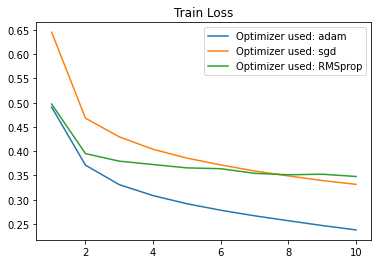

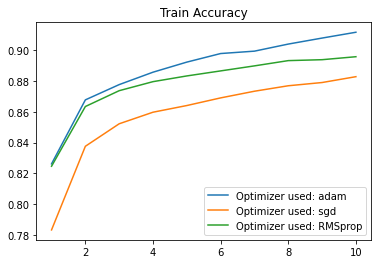

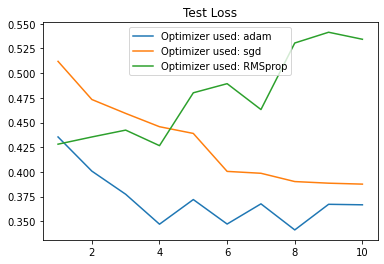

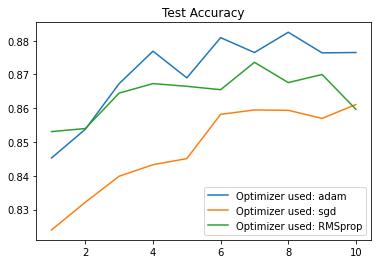

In [8]:
num_epoch = len(results_optimizers[0]['loss'])

plt.figure()
for i in range(len(optimizers)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_optimizers[i]['loss'], label='Optimizer used: '+ str(optimizers[i]))
plt.title("Train Loss")
plt.legend()

plt.figure()
for i in range(len(optimizers)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_optimizers[i]['accuracy'], label='Optimizer used: '+ str(optimizers[i]))
plt.title("Train Accuracy")
plt.legend()

plt.figure()
for i in range(len(optimizers)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_optimizers[i]['val_loss'], label='Optimizer used: '+ str(optimizers[i]))
plt.title("Test Loss")
plt.legend()

plt.figure()
for i in range(len(optimizers)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_optimizers[i]['val_accuracy'], label='Optimizer used: '+ str(optimizers[i]))
plt.title("Test Accuracy")
plt.legend()

## Training with different model architecture

In [11]:
results_models=[]
n_train=training_images.shape[0]

models = ['1layerconv','dense']

for i in range(len(models)):
  results_models.append(train_mnist(batch_size=16, optimizer='adam', model=models[i], epochs=20, verbose = 1))


Epoch 1/20
3750/3750 [==============================] - 10s 2ms/step - loss: 0.4739 - accuracy: 0.8325 - val_loss: 0.2887 - val_accuracy: 0.8938
Epoch 2/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.2532 - accuracy: 0.9057 - val_loss: 0.2765 - val_accuracy: 0.8999
Epoch 3/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1985 - accuracy: 0.9263 - val_loss: 0.2516 - val_accuracy: 0.9092
Epoch 4/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1593 - accuracy: 0.9393 - val_loss: 0.2506 - val_accuracy: 0.9137
Epoch 5/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1258 - accuracy: 0.9536 - val_loss: 0.2723 - val_accuracy: 0.9102
Epoch 6/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1036 - accuracy: 0.9618 - val_loss: 0.2761 - val_accuracy: 0.9167
Epoch 7/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0874 - accuracy: 0.9679 - val_loss: 0.3140 - val_accuracy

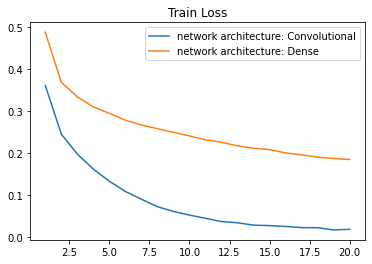

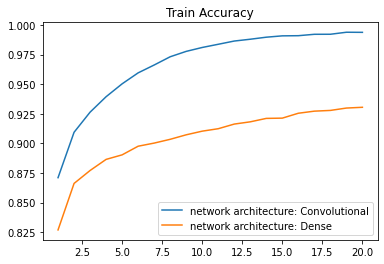

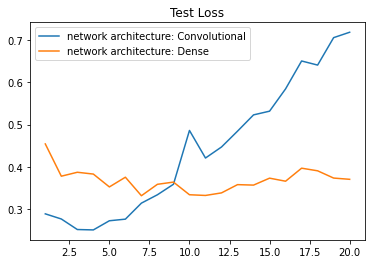

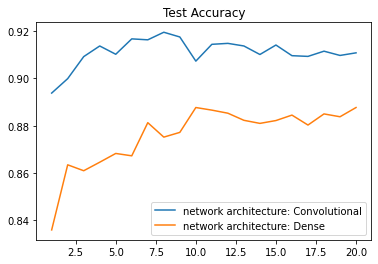

In [12]:
num_epoch = len(results_models[0]['loss'])

models_name = ['Convolutional', 'Dense']

plt.figure()
for i in range(len(models)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_models[i]['loss'], label='network architecture: '+ str(models_name[i]))
plt.title("Train Loss")
plt.legend()

plt.figure()
for i in range(len(models)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_models[i]['accuracy'], label='network architecture: '+ str(models_name[i]))
plt.title("Train Accuracy")
plt.legend()

plt.figure()
for i in range(len(models)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_models[i]['val_loss'], label='network architecture: '+ str(models_name[i]))
plt.title("Test Loss")
plt.legend()

plt.figure()
for i in range(len(models)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_models[i]['val_accuracy'], label='network architecture: '+ str(models_name[i]))
plt.title("Test Accuracy")
plt.legend()